In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import platform
path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~')
    
plt.rcParams['axes.unicode_minus'] = False

In [349]:
population = pd.read_excel('../data/연령_및_성별_인구__시군구_20180713112634.xlsx', header =1)
population.reset_index(inplace=True)
population.fillna(method = 'pad', inplace = True)

population.rename(columns = {'index':'광역시도',
                             '행정구역별(시군구)':'시도',
                             '합계':'인구수'}, inplace=True)
population = population[(population['시도'] != '소계')]


population.head()

,광역시도,시도,항목,인구수,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,65세이상
0,서울특별시,서울특별시,인구(내국인) (명),9470339,371239,365059,376506,516892,673957,720334,...,763943,598732,435313,336992,240627,132351,59317,19842,4358,1229365
1,서울특별시,서울특별시,남자 (명),4636374,190370,187265,194431,263408,334376,356094,...,364202,284156,205629,157699,106687,49862,17258,4833,1037,543088
2,서울특별시,서울특별시,여자 (명),4833965,180869,177794,182075,253484,339581,364240,...,399741,314576,229684,179293,133940,82489,42059,15009,3321,686277
3,서울특별시,종로구,인구(내국인) (명),144049,4137,4392,5001,9654,12024,11887,...,11636,9159,6760,6057,4786,2760,1267,454,114,22218
4,서울특별시,종로구,남자 (명),70844,2130,2261,2573,5098,5931,6262,...,5726,4498,3117,2708,2108,1094,422,132,28,9612


In [350]:
population.is_copy = False

population.rename(columns={'항목':'구분'}, inplace=True)

population.loc[population['구분']=='인구(내국인) (명)','구분'] = '합계'
population.loc[population['구분']=='남자 (명)','구분'] = '남자'
population.loc[population['구분']=='여자 (명)','구분'] = '여자'

population.head()

,광역시도,시도,구분,인구수,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,65세이상
0,서울특별시,서울특별시,합계,9470339,371239,365059,376506,516892,673957,720334,...,763943,598732,435313,336992,240627,132351,59317,19842,4358,1229365
1,서울특별시,서울특별시,남자,4636374,190370,187265,194431,263408,334376,356094,...,364202,284156,205629,157699,106687,49862,17258,4833,1037,543088
2,서울특별시,서울특별시,여자,4833965,180869,177794,182075,253484,339581,364240,...,399741,314576,229684,179293,133940,82489,42059,15009,3321,686277
3,서울특별시,종로구,합계,144049,4137,4392,5001,9654,12024,11887,...,11636,9159,6760,6057,4786,2760,1267,454,114,22218
4,서울특별시,종로구,남자,70844,2130,2261,2573,5098,5931,6262,...,5726,4498,3117,2708,2108,1094,422,132,28,9612


In [351]:
population['0-19세'] = population['0~4세'] + population['5~9세'] + population['10~14세'] + population['15~19세']

population.head(10)

,광역시도,시도,구분,인구수,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,65세이상,0-19세
0,서울특별시,서울특별시,합계,9470339,371239,365059,376506,516892,673957,720334,...,598732,435313,336992,240627,132351,59317,19842,4358,1229365,1629696
1,서울특별시,서울특별시,남자,4636374,190370,187265,194431,263408,334376,356094,...,284156,205629,157699,106687,49862,17258,4833,1037,543088,835474
2,서울특별시,서울특별시,여자,4833965,180869,177794,182075,253484,339581,364240,...,314576,229684,179293,133940,82489,42059,15009,3321,686277,794222
3,서울특별시,종로구,합계,144049,4137,4392,5001,9654,12024,11887,...,9159,6760,6057,4786,2760,1267,454,114,22218,23184
4,서울특별시,종로구,남자,70844,2130,2261,2573,5098,5931,6262,...,4498,3117,2708,2108,1094,422,132,28,9612,12062
5,서울특별시,종로구,여자,73205,2007,2131,2428,4556,6093,5625,...,4661,3643,3349,2678,1666,845,322,86,12606,11122
6,서울특별시,중구,합계,117960,4166,3642,3131,5930,8877,9349,...,7976,5938,4857,3708,2178,1020,330,64,18105,16869
7,서울특별시,중구,남자,57677,2151,1807,1567,2611,4438,4782,...,3864,2831,2164,1550,779,323,96,21,7764,8136
8,서울특별시,중구,여자,60283,2015,1835,1564,3319,4439,4567,...,4112,3107,2693,2158,1399,697,234,43,10341,8733
9,서울특별시,용산구,합계,209710,7957,7381,7163,9686,13786,15720,...,13249,9709,8269,6783,3951,1780,601,120,31233,32187


In [352]:
pop = pd.pivot_table(population, index=['광역시도','시도'], columns=['구분'], values=['인구수','0-19세','65세이상'])
pop                    

0-19세                    65세이상                       인구수  \
구분                 남자      여자       합계      남자      여자       합계       남자   
광역시도  시도                                                                   
경기도   　　　가평군     4806    4650     9456    5520    7170    12690    29550   
      　　　고양시   104324   98969   203293   45892   66173   112065   481396   
      　　　과천시     6520    5963    12483    3014    4381     7395    29523   
      　　　광명시    35476   33341    68817   14957   20388    35345   161708   
      　　　광주시    32972   31304    64276   15319   18463    33782   157014   
      　　　구리시    18979   17879    36858    8483   11151    19634    90284   
      　　　군포시    29955   28309    58264   11955   16321    28276   136553   
      　　　권선구    37476   34892    72368   12952   17229    30181   174611   
      　　　기흥구    51512   48691   100203   18875   24103    42978   200953   
      　　　김포시    41508   39441    80949   17133   21861    38994   172130   
      　　　남양주시   74111   69702   143813   32683   42437    75120   315834   
      　　　단원구    33739   31536    65275   10185   14225    24410   157593   
      　　　덕양구    43235   40934    84169   21817   30929    52746   209879   
      　　　동두천시    9636    9373    19009    6536    9517    16053    47130   
      　　　동안구    36254   34203    70457   13000   17942    30942   164936   
      　　　만안구    21500   20034    41534   12818   16467    29285   119091   
      　　　부천시    78827   74624   153451   36352   49116    85468   407363   
      　　　분당구    52100   49471   101571   21521   28481    50002   229393   
      　　　상록구    39246   37185    76431   13317   19371    32688   187475   
      　　　성남시    91078   86335   177413   46107   60795   106902   459385   
      　　　수원시   130051  120814   250865   43036   58767   101803   585827   
      　　　수정구    18692   17640    36332   12404   16429    28833   113200   
      　　　수지구    41392   39298    80690   17156   21174    38330   162045   
      　　　시흥시    45145   42166    87311   12975   18548    31523   204585   
      　　　안산시    72985   68721   141706   23502   33596    57098   345068   
      　　　안성시    19896   18726    38622   11000   15575    26575    93341   
      　　　안양시    57754   54237   111991   25818   34409    60227   284027   
      　　　양주시    22167   21343    43510   11508   14987    26495    99290   
      　　　양평군     9444    8656    18100    9935   12395    22330    52190   
      　　　여주시    10459    9836    20295    8202   10847    19049    53511   
...               ...     ...      ...     ...     ...      ...      ...   
서울특별시 　　　금천구    17224   16708    33932   13770   16620    30390   112892   
      　　　노원구    56302   52800   109102   28195   39971    68166   267903   
      　　　도봉구    29112   27636    56748   21623   27224    48847   163364   
      　　　동대문구   27410   26595    54005   22290   28143    50433   171397   
      　　　동작구    32114   30211    62325   23153   29285    52438   190563   
      　　　마포구    30808   29952    60760   19078   26183    45261   174215   
      　　　서대문구   24900   25219    50119   18927   25712    44639   147301   
      　　　서초구    42250   40823    83073   21840   25676    47516   197771   
      　　　성동구    23310   22734    46044   15989   20941    36930   141022   
      　　　성북구    39529   38796    78325   26165   34472    60637   213250   
      　　　송파구    59703   56435   116138   31145   36363    67508   300796   
      　　　양천구    48773   44909    93682   22170   27644    49814   224290   
      　　　영등포구   28235   26342    54577   21694   26523    48217   173997   
      　　　용산구    16390   15797    32187   13204   18029    31233   100642   
      　　　은평구    42038   40007    82045   29506   38217    67723   226844   
      　　　종로구    12062   11122    23184    9612   12606    22218    70844   
      　　　중구      8136    8733    16869    7764   10341    18105    57677   
      　　　중랑구    31806   30088    61894   23910   29893    53803   195451   
      서울특별시    835474  794222  1629696  543088  686277  1229365 

In [353]:
pop['청소년비율'] = pop['0-19세','합계'] / (pop['65세이상','합계'])
pop.head()

0-19세                 65세이상                    인구수          \
구분               남자     여자      합계     남자     여자      합계      남자      여자   
광역시도 시도                                                                    
경기도  　　　가평군    4806   4650    9456   5520   7170   12690   29550   28567   
     　　　고양시  104324  98969  203293  45892  66173  112065  481396  501186   
     　　　과천시    6520   5963   12483   3014   4381    7395   29523   30975   
     　　　광명시   35476  33341   68817  14957  20388   35345  161708  164832   
     　　　광주시   32972  31304   64276  15319  18463   33782  157014  150341   

                        청소년비율  
구분               합계            
광역시도 시도                        
경기도  　　　가평군   58117  0.745154  
     　　　고양시  982582  1.814063  
     　　　과천시   60498  1.688032  
     　　　광명시  326540  1.947008  
     　　　광주시  307355  1.902670

In [354]:
pop['고령화지역'] = pop['청소년비율'] < 1.0
pop.head()

0-19세                 65세이상                    인구수          \
구분               남자     여자      합계     남자     여자      합계      남자      여자   
광역시도 시도                                                                    
경기도  　　　가평군    4806   4650    9456   5520   7170   12690   29550   28567   
     　　　고양시  104324  98969  203293  45892  66173  112065  481396  501186   
     　　　과천시    6520   5963   12483   3014   4381    7395   29523   30975   
     　　　광명시   35476  33341   68817  14957  20388   35345  161708  164832   
     　　　광주시   32972  31304   64276  15319  18463   33782  157014  150341   

                        청소년비율  고령화지역  
구분               합계                   
광역시도 시도                               
경기도  　　　가평군   58117  0.745154   True  
     　　　고양시  982582  1.814063  False  
     　　　과천시   60498  1.688032  False  
     　　　광명시  326540  1.947008  False  
     　　　광주시  307355  1.902670  False

In [355]:
pop.reset_index(inplace=True)
pop.head()

광역시도      시도   0-19세                 65세이상                    인구수          \
구분                   남자     여자      합계     남자     여자      합계      남자      여자   
0   경기도  　　　가평군    4806   4650    9456   5520   7170   12690   29550   28567   
1   경기도  　　　고양시  104324  98969  203293  45892  66173  112065  481396  501186   
2   경기도  　　　과천시    6520   5963   12483   3014   4381    7395   29523   30975   
3   경기도  　　　광명시   35476  33341   68817  14957  20388   35345  161708  164832   
4   경기도  　　　광주시   32972  31304   64276  15319  18463   33782  157014  150341   

               청소년비율  고령화지역  
구분      합계                   
0    58117  0.745154   True  
1   982582  1.814063  False  
2    60498  1.688032  False  
3   326540  1.947008  False  
4   307355  1.902670  False

In [356]:
tmp_columns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
              for n in range(0,len(pop.columns.get_level_values(0)))]
pop.columns = tmp_columns

pop.head()

,광역시도,시도,0-19세남자,0-19세여자,0-19세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,청소년비율,고령화지역
0,경기도,가평군,4806,4650,9456,5520,7170,12690,29550,28567,58117,0.745154,True
1,경기도,고양시,104324,98969,203293,45892,66173,112065,481396,501186,982582,1.814063,False
2,경기도,과천시,6520,5963,12483,3014,4381,7395,29523,30975,60498,1.688032,False
3,경기도,광명시,35476,33341,68817,14957,20388,35345,161708,164832,326540,1.947008,False
4,경기도,광주시,32972,31304,64276,15319,18463,33782,157014,150341,307355,1.902670,False


In [357]:
pop

,광역시도,시도,0-19세남자,0-19세여자,0-19세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,청소년비율,고령화지역
0,경기도,가평군,4806,4650,9456,5520,7170,12690,29550,28567,58117,0.745154,True
1,경기도,고양시,104324,98969,203293,45892,66173,112065,481396,501186,982582,1.814063,False
2,경기도,과천시,6520,5963,12483,3014,4381,7395,29523,30975,60498,1.688032,False
3,경기도,광명시,35476,33341,68817,14957,20388,35345,161708,164832,326540,1.947008,False
4,경기도,광주시,32972,31304,64276,15319,18463,33782,157014,150341,307355,1.902670,False
5,경기도,구리시,18979,17879,36858,8483,11151,19634,90284,91904,182188,1.877254,False
6,경기도,군포시,29955,28309,58264,11955,16321,28276,136553,138823,275376,2.060546,False
7,경기도,권선구,37476,34892,72368,12952,17229,30181,174611,171981,346592,2.397800,False
8,경기도,기흥구,51512,48691,100203,18875,24103,42978,200953,204918,405871,2.331495,False
9,경기도,김포시,41508,39441,80949,17133,21861,38994,172130,171614,343744,2.075935,False


In [358]:
pop[(pop['시도'] == '경기도') | (pop['시도'] == '서울특별시') | (pop['시도'] == '인천광역시') ]


,광역시도,시도,0-19세남자,0-19세여자,0-19세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,청소년비율,고령화지역
48,경기도,경기도,1344363,1267975,2612338,572398,769256,1341654,6122936,6076321,12199257,1.947103,False
74,서울특별시,서울특별시,835474,794222,1629696,543088,686277,1229365,4636374,4833965,9470339,1.325640,False
85,인천광역시,인천광역시,292320,275696,568016,135020,181872,316892,1423740,1417411,2841151,1.792459,False


In [359]:
pop.drop([48,74,85], inplace=True)

In [360]:
pop.reset_index(inplace=True)

In [361]:
del pop['index']

In [362]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 13 columns):
광역시도       83 non-null object
시도         83 non-null object
0-19세남자    83 non-null int64
0-19세여자    83 non-null int64
0-19세합계    83 non-null int64
65세이상남자    83 non-null int64
65세이상여자    83 non-null int64
65세이상합계    83 non-null int64
인구수남자      83 non-null int64
인구수여자      83 non-null int64
인구수합계      83 non-null int64
청소년비율      83 non-null float64
고령화지역      83 non-null bool
dtypes: bool(1), float64(1), int64(9), object(2)
memory usage: 7.9+ KB


In [363]:
pop['시도'].unique()

array(['\u3000\u3000\u3000가평군', '\u3000\u3000\u3000고양시',
       '\u3000\u3000\u3000과천시', '\u3000\u3000\u3000광명시',
       '\u3000\u3000\u3000광주시', '\u3000\u3000\u3000구리시',
       '\u3000\u3000\u3000군포시', '\u3000\u3000\u3000권선구',
       '\u3000\u3000\u3000기흥구', '\u3000\u3000\u3000김포시',
       '\u3000\u3000\u3000남양주시', '\u3000\u3000\u3000단원구',
       '\u3000\u3000\u3000덕양구', '\u3000\u3000\u3000동두천시',
       '\u3000\u3000\u3000동안구', '\u3000\u3000\u3000만안구',
       '\u3000\u3000\u3000부천시', '\u3000\u3000\u3000분당구',
       '\u3000\u3000\u3000상록구', '\u3000\u3000\u3000성남시',
       '\u3000\u3000\u3000수원시', '\u3000\u3000\u3000수정구',
       '\u3000\u3000\u3000수지구', '\u3000\u3000\u3000시흥시',
       '\u3000\u3000\u3000안산시', '\u3000\u3000\u3000안성시',
       '\u3000\u3000\u3000안양시', '\u3000\u3000\u3000양주시',
       '\u3000\u3000\u3000양평군', '\u3000\u3000\u3000여주시',
       '\u3000\u3000\u3000연천군', '\u3000\u3000\u3000영통구',
       '\u3000\u3000\u3000오산시', '\u3000\u3000\u3000용인시',
       '\u3000\u3000\u3000의왕시

In [364]:
sido = pop['시도']
sido2 = [s.strip() for s in sido]
pop['시도'] = sido2

In [365]:
si_name = [None] * len(pop)

tmp_gu_dict = {'수원':['장안구','권선구','팔달구','영통구'],'성남':['수정구','중원구','분당구'],'안양':['만안구','동안구'],
              '안산':['상록구','단원구'],'고양':['덕양구','일산동구','일산서구'],'용인':['처인구','기흥구','수지구'],
              '부천':['오정구','원미구','소사구']}

In [366]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

In [367]:
si_name

['가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '용인',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '서울 강남',
 '서울 강동',
 '서울 강북',
 '서울 강서',
 '서울 관악',
 '서울 광진',
 '서울 구로',
 '서울 금천',
 '서울 노원',
 '서울 도봉',
 '서울 동대문',
 '서울 동작',
 '서울 마포',
 '서울 서대문',
 '서울 서초',
 '서울 성동',
 '서울 성북',
 '서울 송파',
 '서울 양천',
 '서울 영등포',
 '서울 용산',
 '서울 은평',
 '서울 종로',
 '서울 중구',
 '서울 중랑',
 '인천 강화',
 '인천 계양',
 '인천 남구',
 '인천 남동',
 '인천 동구',
 '인천 부평',
 '인천 서구',
 '인천 연수',
 '인천 옹진',
 '인천 중구']

In [368]:
pop['ID'] = si_name

In [369]:
del pop['0-19세남자']
del pop['0-19세여자']
del pop['65세이상남자']
del pop['65세이상여자']

In [370]:
pop[pop['ID'] == 'None']

,광역시도,시도,0-19세합계,65세이상합계,인구수남자,인구수여자,인구수합계,청소년비율,고령화지역,ID


In [371]:
draw_korea_raw = pd.read_excel('../data/05. draw_korea_raw.xlsx', encoding = 'EUR-KR')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [372]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns = {'level_0':'y','level_1':'x',0:'ID'},inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [373]:
draw_korea = draw_korea_raw_stacked

In [427]:
BORDER_LINES = [
    [(4, 1), (4,2), (6,2), (6,3), (10,3), (10,0)], # 인천
    [(4,4), (4,5), (1,5), (1,7), (3,7), (3,9), (6,9), 
     (6,7), (8,7), (8,5), (9,5), (9,4), (4,4)], # 서울
    [(0,7), (0,8), (2,8), (2,10), (9,10), (9,7), 
     (11,7), (11,6), (10,6), (10,5), (11, 5), (11,4), 
     (10,4), (10,3)], # 경기도
#     [(8,10), (8,11), (6,11), (6,12)], # 강원도
#     [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
#      (15,4), (16,4), (16,2)], # 충청북도
#     [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
#      (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
#     [(13,5), (13,6), (16,6)], # 대전시
#     [(13,5), (14,5)], #세종시
#     [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
#     [(20,5), (21,5), (21,6), (23,6)], #전라남도
#     [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
#     [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
#     [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
#     [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
#     [(16,11), (16,13)], #울산
# #     [(9,14), (9,15)], 
#     [(27,5), (27,6), (25,6)],
]

In [418]:
BORDER_LINES

[[(5, 0), (5, 1), (7, 1), (7, 2), (11, 2), (11, 0)],
 [(5, 3),
  (5, 4),
  (2, 4),
  (2, 6),
  (4, 6),
  (4, 8),
  (7, 8),
  (7, 6),
  (9, 6),
  (9, 4),
  (10, 4),
  (10, 3),
  (5, 3)],
 [(1, 6),
  (1, 7),
  (3, 7),
  (3, 9),
  (10, 9),
  (10, 6),
  (12, 6),
  (12, 5),
  (11, 5),
  (11, 4),
  (12, 4),
  (12, 3),
  (11, 3),
  (11, 2)]]

In [416]:
for gu in range(len(BORDER_LINES)):
    for si in range(len(BORDER_LINES[gu])):
        BORDER_LINES[gu][si][1]= BORDER_LINES[gu][si][1]-1


TypeError: 'tuple' object does not support item assignment

0

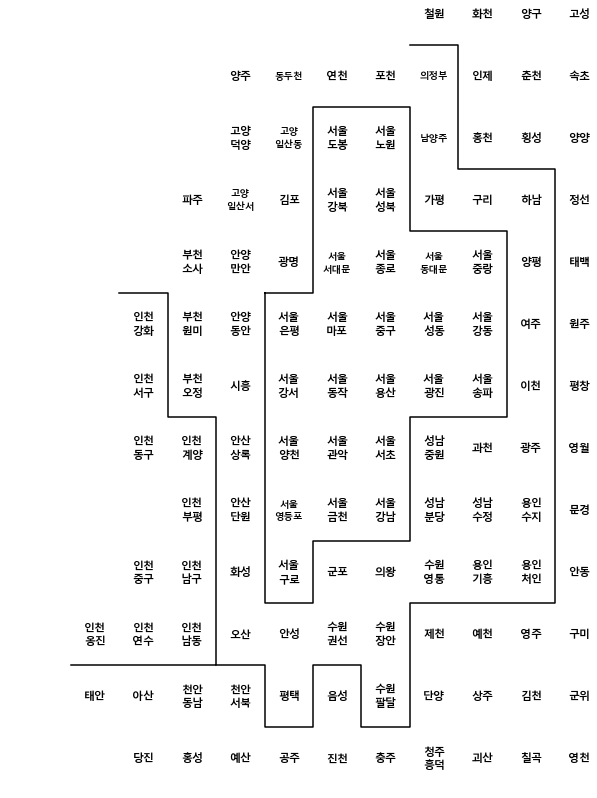

In [375]:
plt.figure(figsize=(8,11))

for idx, row in draw_korea.iterrows():
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight = 'bold', fontsize = fontsize,
                 ha = 'center', va = 'center', linespacing = linespacing)
    
for path in BORDER_LINES:
    ys,xs = zip(*path)
    plt.plot(xs,ys, c='black',lw=1.5)
    
plt.gca().invert_yaxis()
# plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()
    

In [376]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

{'강릉',
 '강진',
 '거제',
 '거창',
 '경산',
 '경주',
 '계룡',
 '고령',
 '고성(강원)',
 '고성(경남)',
 '고창',
 '고흥',
 '곡성',
 '공주',
 '광양',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '괴산',
 '구례',
 '구미',
 '군산',
 '군위',
 '금산',
 '김제',
 '김천',
 '김해',
 '나주',
 '남원',
 '남해',
 '논산',
 '단양',
 '담양',
 '당진',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구',
 '대전 서구',
 '대전 유성',
 '대전 중구',
 '동해',
 '목포',
 '무안',
 '무주',
 '문경',
 '밀양',
 '보령',
 '보성',
 '보은',
 '봉화',
 '부산 강서',
 '부산 금정',
 '부산 기장',
 '부산 남구',
 '부산 동구',
 '부산 동래',
 '부산 부산진',
 '부산 북구',
 '부산 사상',
 '부산 사하',
 '부산 서구',
 '부산 수영',
 '부산 연제',
 '부산 영도',
 '부산 중구',
 '부산 해운대',
 '부안',
 '부여',
 '부천 소사',
 '부천 오정',
 '부천 원미',
 '사천',
 '산청',
 '삼척',
 '상주',
 '서귀포',
 '서산',
 '서천',
 '성주',
 '세종',
 '속초',
 '순창',
 '순천',
 '신안',
 '아산',
 '안동',
 '양구',
 '양산',
 '양양',
 '여수',
 '영광',
 '영덕',
 '영동',
 '영암',
 '영양',
 '영월',
 '영주',
 '영천',
 '예산',
 '예천',
 '옥천',
 '완도',
 '완주',
 '울릉',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '울산 중구',
 '울진',
 '원주',
 '음성',
 '의령',
 '의성',
 '

In [377]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인'}

In [378]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
    
print(set(pop['ID'].unique())-set(draw_korea['ID'].unique()))

set()


In [379]:
pop = pd.merge(pop,draw_korea, how = 'left', on = ['ID'])
pop.head()

,광역시도,시도,0-19세합계,65세이상합계,인구수남자,인구수여자,인구수합계,청소년비율,고령화지역,ID,y,x
0,경기도,가평군,9456,12690,29550,28567,58117,0.745154,True,가평,3,7
1,경기도,과천시,12483,7395,29523,30975,60498,1.688032,False,과천,7,8
2,경기도,광명시,68817,35345,161708,164832,326540,1.947008,False,광명,4,4
3,경기도,광주시,64276,33782,157014,150341,307355,1.902670,False,광주,7,9
4,경기도,구리시,36858,19634,90284,91904,182188,1.877254,False,구리,3,8


In [381]:
dfy = pop['y']
dfy2 = dfy - 1
pop['y'] = dfy2

In [428]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

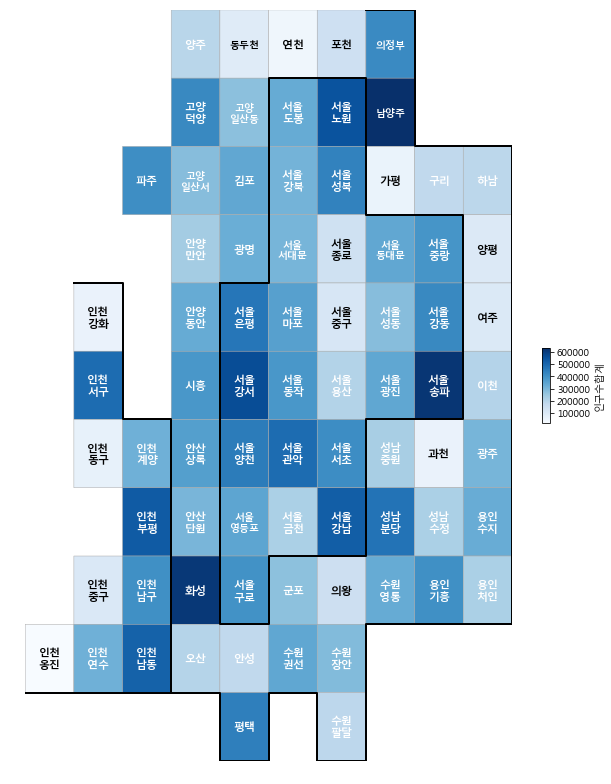

In [429]:
drawKorea('인구수합계', pop, 'Blues')

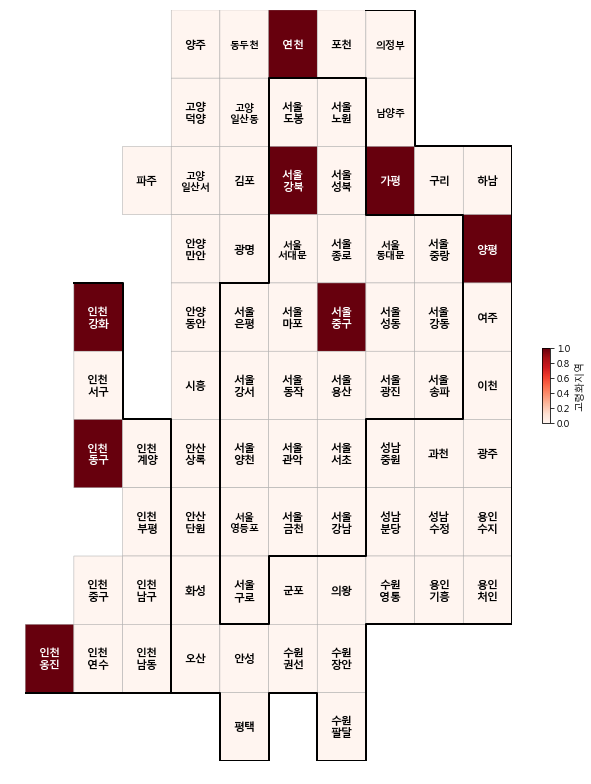

In [430]:
pop['고령화지역'] = [1 if con else 0 for con in pop['고령화지역']]
drawKorea('고령화지역', pop, 'Reds')

In [431]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [432]:
pop.head()

,광역시도,시도,0-19세합계,65세이상합계,인구수남자,인구수여자,인구수합계,청소년비율,고령화지역,ID,y,x,고령자비율,청소년비
0,경기도,가평군,9456,12690,29550,28567,58117,0.745154,1,가평,2,7,21.835263,16.270626
1,경기도,과천시,12483,7395,29523,30975,60498,1.688032,0,과천,6,8,12.223545,20.633740
2,경기도,광명시,68817,35345,161708,164832,326540,1.947008,0,광명,3,4,10.824095,21.074600
3,경기도,광주시,64276,33782,157014,150341,307355,1.902670,0,광주,6,9,10.991199,20.912625
4,경기도,구리시,36858,19634,90284,91904,182188,1.877254,0,구리,2,8,10.776780,20.230751


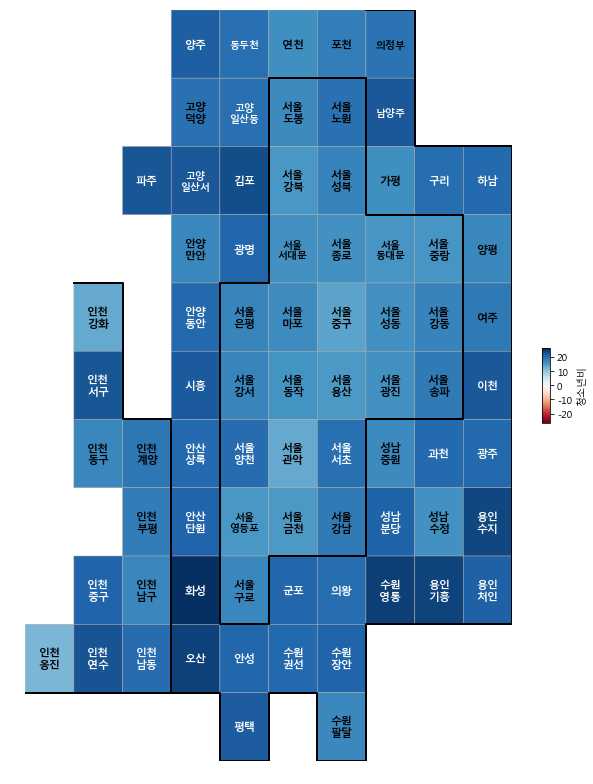

In [433]:
pop['청소년비'] = (pop['0-19세합계']/pop['인구수합계'])*100
drawKorea('청소년비', pop, 'RdBu')

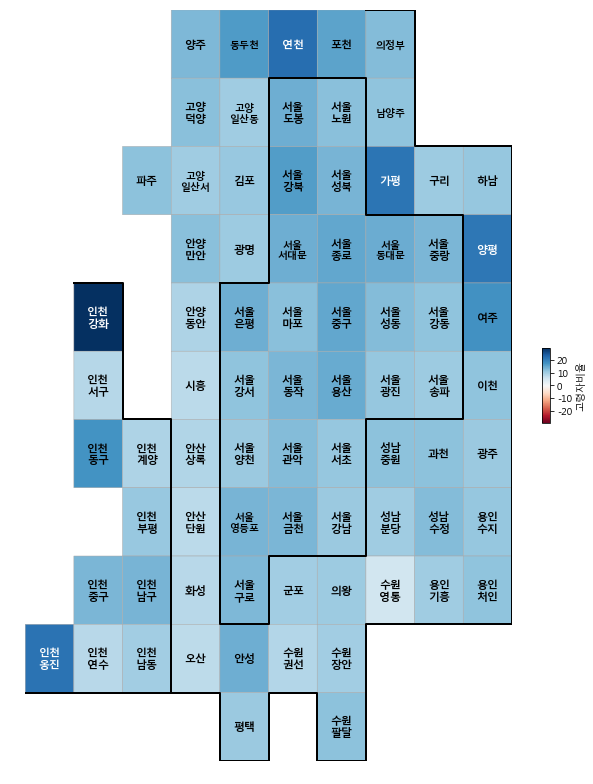

In [434]:
pop['고령자비율'] = (pop['65세이상합계']/pop['인구수합계'])*100
drawKorea('고령자비율', pop, 'RdBu')

In [190]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,0-19세합계,65세이상합계,인구수남자,인구수여자,인구수합계,청소년비율,고령화지역,y,x,청소년비,고령자비율
ID,,,,,,,,,,,,,
가평,경기도,가평군,9456,12690,29550,28567,58117,0.745154,1,3,7,16.270626,21.835263
과천,경기도,과천시,12483,7395,29523,30975,60498,1.688032,0,7,8,20.633740,12.223545
광명,경기도,광명시,68817,35345,161708,164832,326540,1.947008,0,4,4,21.074600,10.824095
광주,경기도,광주시,64276,33782,157014,150341,307355,1.902670,0,7,9,20.912625,10.991199
구리,경기도,구리시,36858,19634,90284,91904,182188,1.877254,0,3,8,20.230751,10.776780


In [191]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [196]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.566535, 126.97796919999996], zoom_start=9)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map